Import required packages:

In [4]:
from sqlalchemy import create_engine
import pandas as pd
import yaml
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from scipy.stats import yeojohnson
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Import required modules:

In [5]:
import db_utils
import datatype_transform
import dataframe_transform
import dataframe_info
import plotter

Import data from RDS database:

In [6]:
customer_activity_class = db_utils.RDSDatabaseConnector(db_utils.yaml_dictionary)
engine = customer_activity_class.connect_database()
customer_activity = customer_activity_class.extract_data(engine)

Convert data types:

In [7]:
# Get the data type for each column
print('Data types before the transformation:')
print(customer_activity.dtypes)
         
# Covert data types for some columns to category 
customer_activity_DataTransform = datatype_transform.DatatypeTransform(customer_activity)
columns_to_transform = ['administrative', 'product_related', 'informational', 
                        'month', 'operating_systems', 'browser', 'region', 
                        'traffic_type', 'visitor_type']
for column in columns_to_transform:
    customer_activity_DataTransform.convert_to_category(column)
    
# Check if the columns have been transformed correctly  
print('\n')  
print('Data types after the transformation:')
print(customer_activity.dtypes)

Data types before the transformation:
administrative              float64
administrative_duration     float64
informational                 int64
informational_duration      float64
product_related             float64
product_related_duration    float64
bounce_rates                float64
exit_rates                  float64
page_values                 float64
month                        object
operating_systems            object
browser                      object
region                       object
traffic_type                 object
visitor_type                 object
weekend                        bool
revenue                        bool
dtype: object


Data types after the transformation:
administrative              category
administrative_duration      float64
informational               category
informational_duration       float64
product_related             category
product_related_duration     float64
bounce_rates                 float64
exit_rates                   float64
p

Following columns have been converted to category data type:
- administrative
- informational
- product_related
- month
- operating_systems
- browser
- region
- traffic_type
- visitor_type

Put columns into different groups based on data types:

In [8]:
all_columns = customer_activity.columns
numeric_columns = ['administrative_duration', 'informational_duration', 'product_related_duration',
                   'bounce_rates', 'exit_rates', 'page_values']
categorical_columns = ['administrative', 'informational', 'product_related', 'month',
                       'operating_systems', 'browser', 'region', 'visitor_type']
boolean_columns = ['weekend', 'revenue']

Create instances of the classes:

In [9]:
customer_activity_info = dataframe_info.DataFrameInfo(customer_activity)
customer_activity_plot = plotter.Plotter(customer_activity)
customer_activity_transform = dataframe_transform.DataFrameTransform(customer_activity)

Get the information for the amount of missing values in each column:

In [10]:
for column in all_columns:
    customer_activity_info.get_NULL_counts(column)

Number of NULLs for administrative: 570
Percentage of NULLs for administrative: 4.62 %
Number of NULLs for administrative_duration: 912
Percentage of NULLs for administrative_duration: 7.4 %
Number of NULLs for informational: 0
Percentage of NULLs for informational: 0.0 %
Number of NULLs for informational_duration: 336
Percentage of NULLs for informational_duration: 2.73 %
Number of NULLs for product_related: 579
Percentage of NULLs for product_related: 4.7 %
Number of NULLs for product_related_duration: 201
Percentage of NULLs for product_related_duration: 1.63 %
Number of NULLs for bounce_rates: 0
Percentage of NULLs for bounce_rates: 0.0 %
Number of NULLs for exit_rates: 0
Percentage of NULLs for exit_rates: 0.0 %
Number of NULLs for page_values: 0
Percentage of NULLs for page_values: 0.0 %
Number of NULLs for month: 0
Percentage of NULLs for month: 0.0 %
Number of NULLs for operating_systems: 11
Percentage of NULLs for operating_systems: 0.09 %
Number of NULLs for browser: 0
Percen

Following columns contain missing values:
- administrative
- administrative_duration
- informational_duration
- product_related
- product_related_duration
- operating_systems

For categorical columns (administrative, product_realted, and operating_systems),
mode imputation will be used.
For numeric columns (administrative_duration, informational_duration, and product_related_duration) if
it is skewed median imputation will be used and if it is symmetrical mean 
imputation will be used.

Check the skewness for these three numeric columns with missing values:

In [11]:
numeric_columns_missing_values = ['administrative_duration', 'informational_duration', 'product_related_duration']
for column in numeric_columns_missing_values:
    customer_activity_info.get_skewness(column)

Skew of administrative_duration is 4.66660795732664
Skew of informational_duration is 7.202649853929625
Skew of product_related_duration is 3.643645285073337


They are both skewed so median imputation will be conducted:

In [12]:
# Compute median imputation for the numeric columns with missing values
for column in numeric_columns_missing_values:
    customer_activity_transform.median_impute(column)
    
# Compute mode imputation for the categorical columns with missing values
categorical_columns_missing_values = ['administrative', 'product_related', 'operating_systems']
for column in categorical_columns_missing_values:
    customer_activity_transform.mode_impute(column)
    
# Check if the imputation has been successful
columns_missing_values = numeric_columns_missing_values + categorical_columns_missing_values
for column in columns_missing_values:
    customer_activity_info.get_NULL_counts(column)

Number of NULLs for administrative_duration: 0
Percentage of NULLs for administrative_duration: 0.0 %
Number of NULLs for informational_duration: 0
Percentage of NULLs for informational_duration: 0.0 %
Number of NULLs for product_related_duration: 0
Percentage of NULLs for product_related_duration: 0.0 %
Number of NULLs for administrative: 0
Percentage of NULLs for administrative: 0.0 %
Number of NULLs for product_related: 0
Percentage of NULLs for product_related: 0.0 %
Number of NULLs for operating_systems: 0
Percentage of NULLs for operating_systems: 0.0 %


Get the information for skewness for all numeric columns:

In [13]:
for column in numeric_columns:
    customer_activity_info.get_skewness(column)

Skew of administrative_duration is 4.84149143609713
Skew of informational_duration is 7.304231016811438
Skew of product_related_duration is 3.6793850860452753
Skew of bounce_rates is 2.949097435579563
Skew of exit_rates is 2.1944198114402966
Skew of page_values is 6.023549371882267


Plot histograms to visualise the skewness:

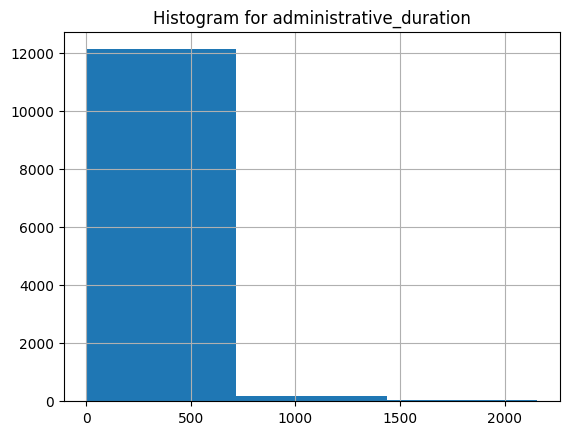

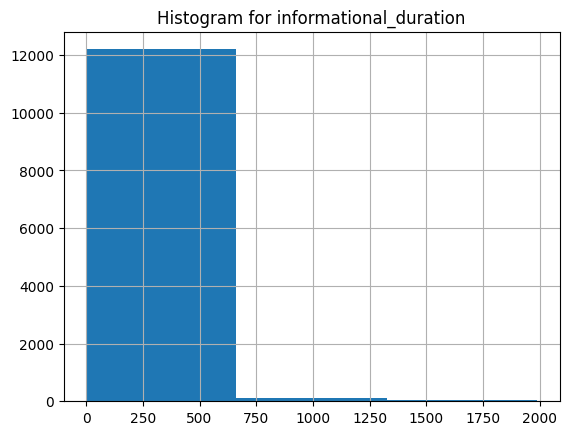

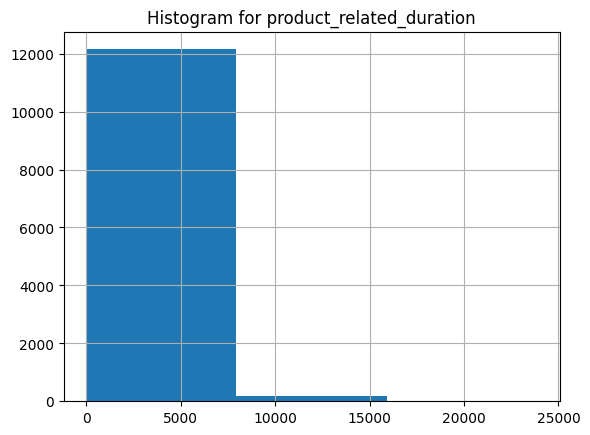

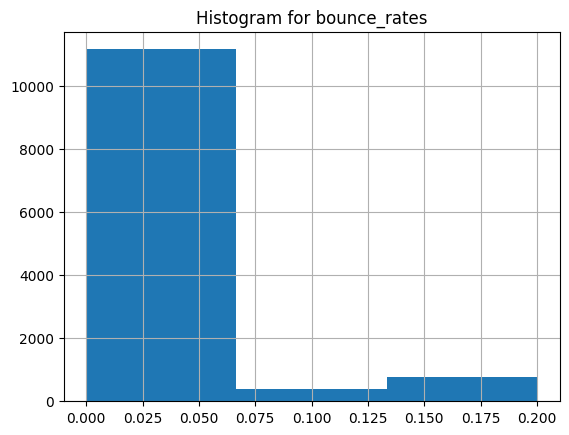

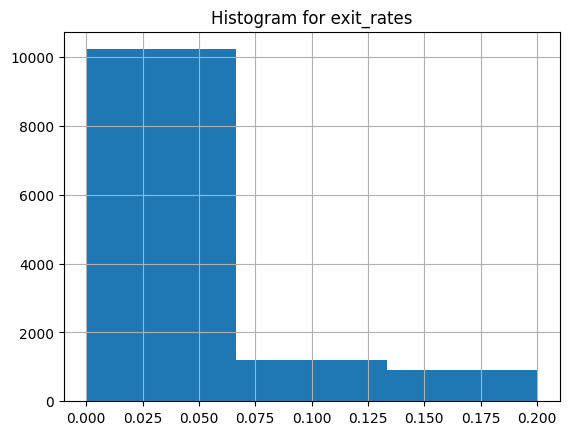

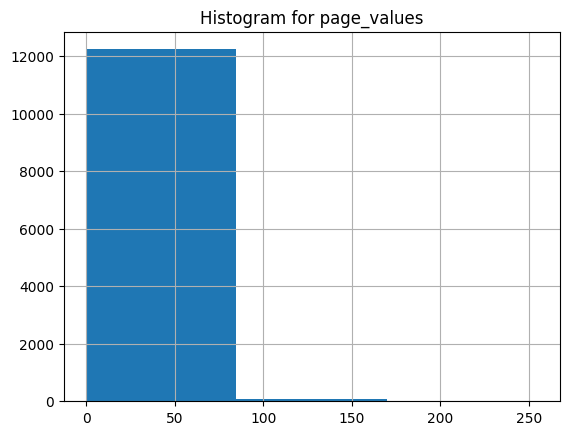

In [15]:
for column in numeric_columns:
    customer_activity_plot.plot_histograms(column)